In [1]:
import pandas as pd
import os
import re

In [2]:
df = pd.read_csv("Comments.csv", encoding='utf8', engine='python')

In [3]:
for index, row in df.iterrows():
    row["Comments"] = row["Comments"].replace(",","") # As vírgulas dos números são removidos 
    row["Comments"] = row["Comments"].replace(".","") # Os pontos dos números são removidos  
    row["Comments"] = row["Comments"].replace("\n","") # As quebras de linhas são removidas

In [4]:
age_Hz = []
Hz = 0
for index, row in df.iterrows():
    matches = re.findall('\d+', str(row["Comments"])) # Guarda todos os números que a string possui
    
    i = 0
    for ele in matches: #Separando informações mútiplas em um comentário
        if int(ele) >= 5000:
            Hz = int(ele)
            i+=1
        else:
            age = int(ele)
            i+=1
        if(i%2==0):
            matches = [age,Hz]
            age_Hz.append(matches)    

In [5]:
initial = len(age_Hz)
for ele in age_Hz: 
    age,Hz = ele[0],ele[1]
    
    if(age>90 or age==0 or Hz>30000):
        age_Hz.remove(ele)
        
lost_of_data = initial-len(age_Hz)
print(lost_of_data)

2888


In [6]:
df = pd.DataFrame(age_Hz,columns =['Age','Hz']) 

In [7]:
print(df)

       Age     Hz
0       16      0
1       14  16000
2       35  14000
3       13  16000
4       15  16000
...    ...    ...
91427   15  16000
91428   11  30000
91429   20  15000
91430   19  17000
91431   19  16000

[91432 rows x 2 columns]


In [21]:
df['Age'].unique()

array([  16,   14,   35,   13,   15,   41,   24,   17,   12,   18,   26,
         52,   19,   36,   21,   10,   23,   29,   11,   22,   30,   44,
         54,   25,   20,   32,    5,   33,   42,   27,    2,   28,   47,
         61,    9,   39,   40,    7,   31,   49,    3,   43,   45,   37,
         50,   58,   64,   48,   46,    8,   38,   68,   34,   55,    6,
         66,   56,   59,   75,   51,   57,    1,   53,    4,   60,   70,
         74,   67,   80,   65,   62,   78,   73,   83,   71,   76,   77,
          0,  360,   63,  720,   79,   72,   69, 3000,   85,   91,   90,
         96, 1000,  125,  110, 1700,   87,  270,  114,   82, 1800, 1380,
        247, 2018,  780,   84, 1678,   89,   86,   81,  846,  200, 1810,
        144, 1080, 1600,  480, 1300, 2020, 1500,  500,  414, 1400,  100,
       1900, 2100, 2000, 1994, 3030,  920, 1005,  681,  323,   92,   88,
        256, 1920], dtype=int64)

In [63]:
dados = df[['Age', 'Hz']].loc[(df['Age'] >= 4) & (df['Age'] < 50) & (df['Hz'] >= 5000) & (df['Hz'] < 30000)]

In [64]:
dados

,Age,Hz
1,14,16000
2,35,14000
3,13,16000
4,15,16000
5,41,20000
...,...,...
91426,33,16000
91427,15,16000
91429,20,15000
91430,19,17000


In [86]:
dados['Age'].unique()

array([14, 35, 13, 15, 41, 24, 17, 18, 16, 26, 12, 19, 36, 21, 10, 23, 29,
       11, 22, 30, 44, 25, 20, 32,  5, 33, 42, 27, 28, 47,  9, 39, 40,  7,
       31, 49, 43, 45, 37, 48, 46,  8, 38, 34,  6,  4], dtype=int64)

In [66]:
dados['Hz'].unique()

array([16000, 14000, 20000, 19000, 21000, 15000, 17000, 27000, 18000,
       13000, 25000, 12000, 22000, 26000, 19789, 9000, 29000, 8000, 10000,
       6000, 23000, 5000, 24000, 11000, 18009, 28000, 18800, 23999, 7000,
       17800, 29009, 18500, 19998, 15500, 18400, 7580, 16200, 9999, 16009,
       21688, 19500, 19900, 18900, 17200, 17500, 15962, 17700, 19100,
       17224, 17999, 15600, 16850, 19899, 15750, 18828, 15420, 7139,
       18550, 20100, 9569, 9583, 16600, 15720, 13300, 8500, 7100, 9800,
       19600, 11500, 17009, 17400, 18600, 19700, 22050, 17100, 19640,
       21134, 20001, 19460, 17300, 21500, 16500, 26500], dtype=object)

In [67]:
dados.shape, df.shape

((87530, 2), (91432, 2))

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

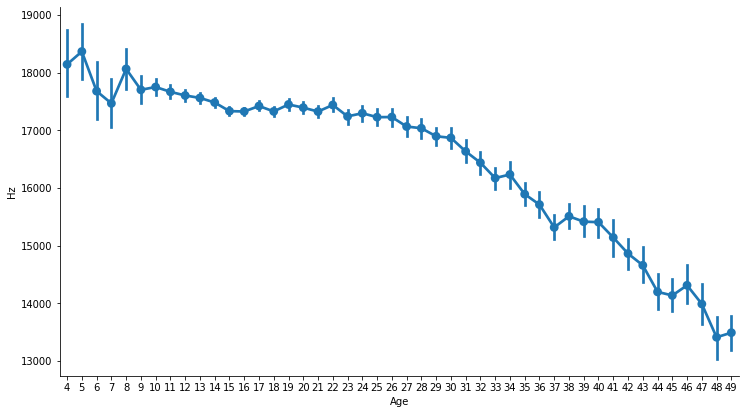

In [73]:
sns.catplot('Age', 'Hz', data=dados, kind='point') # kind= -> tipo

fig=plt.gcf()
fig.set_size_inches(12,6) # largura, altura

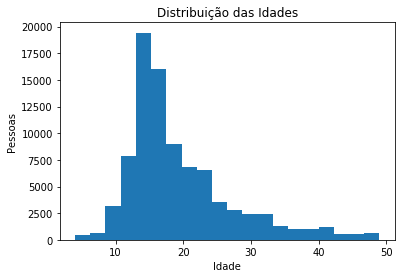

In [90]:
plt.hist(dados['Age'].dropna(), bins=20) # bins= -> quantidade de colunas 
plt.title('Distribuição das Idades') # Adiciona um título
plt.ylabel('Pessoas') # Informação do eixo y
plt.xlabel('Idade') # Informação do eixo x
plt.show()

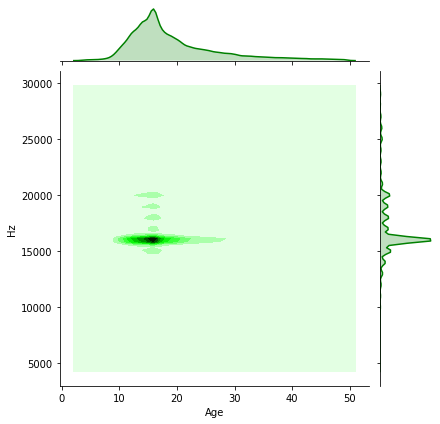

In [92]:
sns.jointplot('Age', 'Hz', data=dados, kind='kde', color='g')
# Onde os dados estão mais concentrados